# Visualisasi dan Storytelling

Visualisasi adalah menggunakan grafik untuk merangkum dan representasi data.

Storytelling adalah membuat naratif yang berguna untuk audiens.


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

## Bar Chart

Biasanya digunakan untuk perbandingan antar kategori


In [2]:
df_nyc = pd.read_csv("dataset/nyc-rolling-sales.csv")

df_nyc.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [4]:
df_nyc['BOROUGH'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [5]:
df_nyc.groupby('BOROUGH').agg({"TOTAL UNITS": "sum"})

,TOTAL UNITS
BOROUGH,
1,48504
2,25403
3,53400
4,51841
5,11016


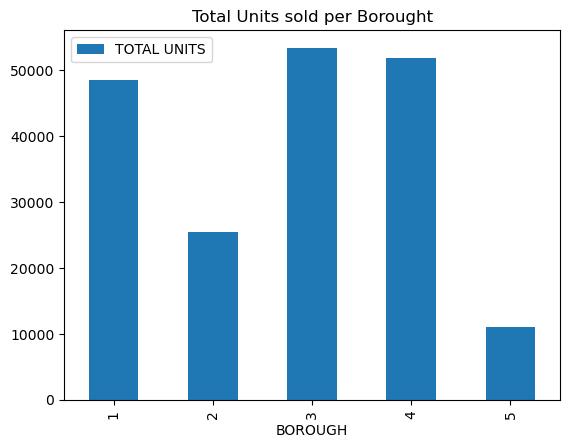

In [36]:
df_nyc.groupby('BOROUGH').agg({"TOTAL UNITS": "sum"}).plot(kind="bar")

plt.title("Total Units sold per Borought")
plt.show()

dalam pandas sendiri ada fungsi "plot" yang bisa kita gunakan untuk bikin chart

lalu plot yang sudah dibuat, bisa kita edit dengan matplotlib pyplot.

selain dengan pandas, kita bisa build plot yang sama dengan matplotlib pyplot.


In [12]:
df_borough_totalunits = df_nyc.groupby('BOROUGH').agg({"TOTAL UNITS": "sum"})
df_borough_totalunits

,TOTAL UNITS
BOROUGH,
1,48504
2,25403
3,53400
4,51841
5,11016


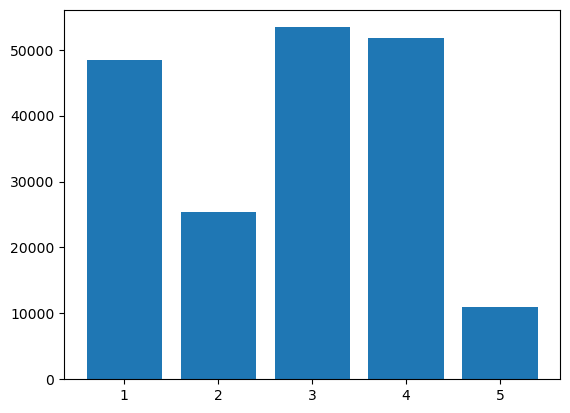

In [18]:
plt.bar(df_borough_totalunits.index, df_borough_totalunits['TOTAL UNITS'])

plt.show()

In [38]:
df_borough_totalunits

,TOTAL UNITS
BOROUGH,
1,48504
2,25403
3,53400
4,51841
5,11016


In [39]:
df_borough_totalunits.index

Index([1, 2, 3, 4, 5], dtype='int64', name='BOROUGH')

In [42]:
# reset index
df_b2 = df_borough_totalunits.reset_index()
df_b2

,BOROUGH,TOTAL UNITS
0,1,48504
1,2,25403
2,3,53400
3,4,51841
4,5,11016


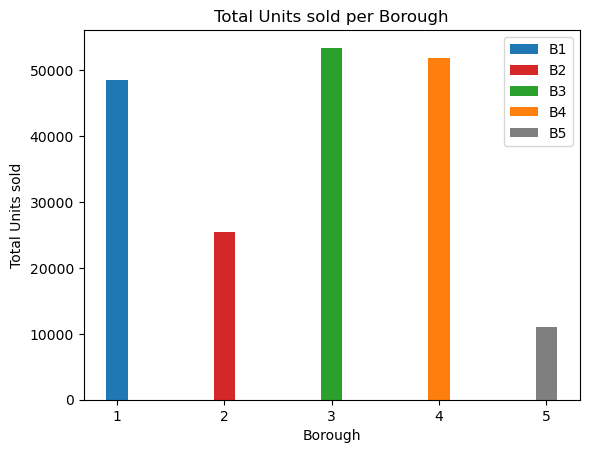

In [43]:
# tambahkan label dan title untuk chart
bar_colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:gray']
labels = ["B1", "B2", "B3", "B4", "B5"]

plt.bar(df_b2['BOROUGH'],
        df_b2['TOTAL UNITS'],
        color=bar_colors,
        label=labels,
        width=0.2
        )
plt.legend(labels)

plt.title("Total Units sold per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Units sold")
plt.show()

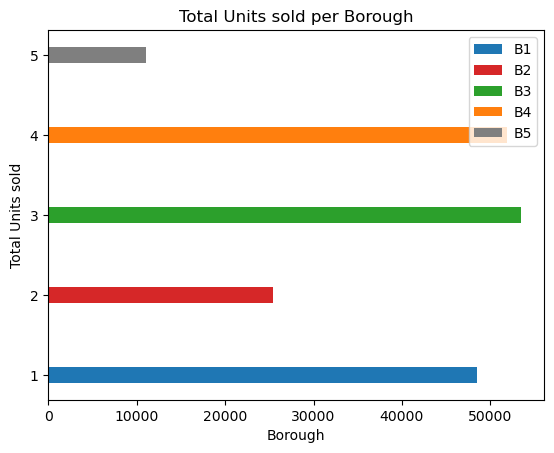

In [34]:
bar_colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:gray']
labels = ["B1", "B2", "B3", "B4", "B5"]

plt.barh(df_borough_totalunits.index,
         df_borough_totalunits['TOTAL UNITS'],
         color=bar_colors,
         label=labels,
         height=0.2
         )
plt.legend(labels)

plt.title("Total Units sold per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Units sold")
plt.show()

## Pie Chart

Menunjukkan proporsi dari sebuah keseluruhan

Misalnya kita mau bandingkan market share EV dari data https://www.kaggle.com/datasets/samanfatima7/2025-electric-and-hybrid-cars-in-washington-usa


In [45]:
df_ev = pd.read_csv("dataset/Electric_Vehicle_Population_Data.csv")
df_ev.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10


In [46]:
df_ev['Make'].value_counts()

Make
TESLA                     105253
CHEVROLET                  18223
NISSAN                     16085
FORD                       13492
KIA                        12171
BMW                        10551
TOYOTA                     10429
HYUNDAI                     8328
RIVIAN                      7637
VOLVO                       6570
VOLKSWAGEN                  6478
JEEP                        6368
AUDI                        4590
CHRYSLER                    3587
MERCEDES-BENZ               2816
HONDA                       2438
SUBARU                      2190
PORSCHE                     1715
CADILLAC                    1472
POLESTAR                    1427
MAZDA                       1235
MINI                        1192
LEXUS                       1138
MITSUBISHI                  1126
FIAT                         851
LUCID                        463
GMC                          445
GENESIS                      417
LINCOLN                      407
ACURA                        321
DODGE

In [49]:
# ambil top 5 sisanya digabung

df_ev_top5 = df_ev['Make'].value_counts().head(5)
df_ev_top5

Make
TESLA        105253
CHEVROLET     18223
NISSAN        16085
FORD          13492
KIA           12171
Name: count, dtype: int64

In [60]:
df_ev_top5 = pd.DataFrame(df_ev_top5)
df_ev_top5

,count
Make,
TESLA,105253
CHEVROLET,18223
NISSAN,16085
FORD,13492
KIA,12171


In [61]:
df_ev_top5.sum()

count    165224
dtype: int64

In [62]:
total_sisa = df_ev['Make'].value_counts().sum() - df_ev_top5.sum()
total_sisa

count    85435
dtype: int64

In [64]:
df_6 = pd.DataFrame(index=["OTHERS"], data=[total_sisa], columns=["count"])
df_6

,count
OTHERS,85435


In [66]:
df_top6 = pd.concat([df_ev_top5, df_6])
df_top6

,count
TESLA,105253
CHEVROLET,18223
NISSAN,16085
FORD,13492
KIA,12171
OTHERS,85435


untuk membuat Pie Chart, datanya perlu menjadi 1D, sebuah Series. Jadi disini kita set aja kolom mana yang kita gunakan.


<Axes: ylabel='count'>

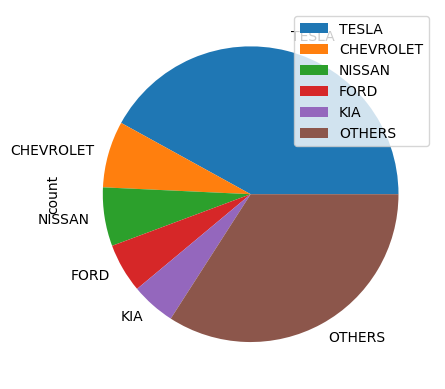

In [69]:
df_top6.plot(y="count", kind="pie")

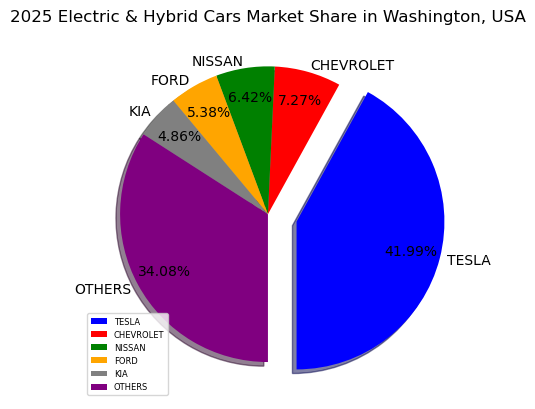

In [104]:
# matplotlib bisa buat pie chart

plt.pie(df_top6['count'],
        labels=df_top6.index,
        startangle=270,
        autopct="%1.2f%%",
        pctdistance=0.8,
        labeldistance=1.05,
        explode=[0.2, 0, 0, 0, 0, 0],
        colors=['blue', 'red', 'green',
                'orange', 'gray', 'purple'],
        shadow=True
        )
plt.title("2025 Electric & Hybrid Cars Market Share in Washington, USA")
plt.legend(df_top6.index, loc="lower left", fontsize=6)
plt.show()

## Line Chart

Biasa digunakan untuk melihat perubahan data melewati waktu, melihat apakah data naik/turun/tetap, melihat trend


In [105]:
df_kopi = pd.read_csv("dataset/coffee_sales.csv")

df_kopi.head(3)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [107]:
# kita rangkum per hari total penjualannya berapa
df_kopi2 = df_kopi.groupby('date').agg({"money": "sum"})
df_kopi2

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,623.56
2025-03-20,597.60
2025-03-21,636.80


In [108]:
df_kopi2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 2024-03-01 to 2025-03-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   money   381 non-null    float64
dtypes: float64(1)
memory usage: 6.0+ KB


<Axes: xlabel='date'>

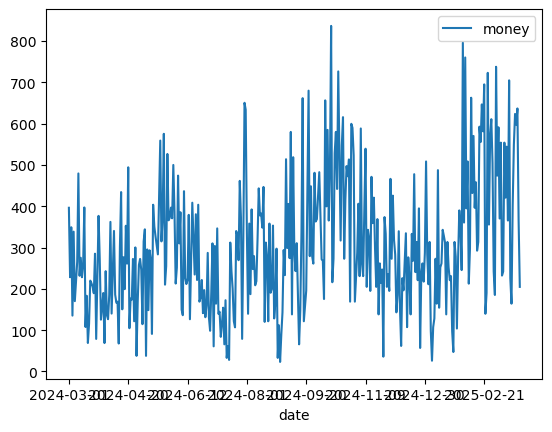

In [109]:
df_kopi2.plot(kind="line")

In [112]:
# rangkum per bulan, total penjualan

# kita keluarkan kolom index menjadi sebuah kolom "date"
df_kopi3 = df_kopi2.reset_index()

# ubah kolom date menjadi tipe data datetime
df_kopi3['date'] = pd.to_datetime(df_kopi3['date'])

df_kopi3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    381 non-null    datetime64[ns]
 1   money   381 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [113]:
# lanjut rangkum per bulan
df_kopi3['year'] = df_kopi3['date'].dt.year
df_kopi3['month'] = df_kopi3['date'].dt.month

df_kopi3.head()

,date,money,year,month
0,2024-03-01,396.3,2024,3
1,2024-03-02,228.1,2024,3
2,2024-03-03,349.1,2024,3
3,2024-03-04,135.2,2024,3
4,2024-03-05,338.5,2024,3


In [114]:
df_kopi3['year'].unique()

array([2024, 2025])

In [116]:
df_kopi_monthly = df_kopi3.groupby(['year', 'month']).agg({"money": "sum"})
df_kopi_monthly

money
year month          
2024 3       7050.20
     4       6720.56
     5       9063.42
     6       7758.76
     7       6915.94
     8       7613.84
     9       9988.64
     10     13891.16
     11      8590.54
     12      8237.74
2025 1       6398.86
     2      13215.48
     3       9986.44

In [121]:
df_kopi_monthly.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13 entries, (2024, 3) to (2025, 3)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   money   13 non-null     float64
dtypes: float64(1)
memory usage: 293.0 bytes


<Axes: xlabel='year,month'>

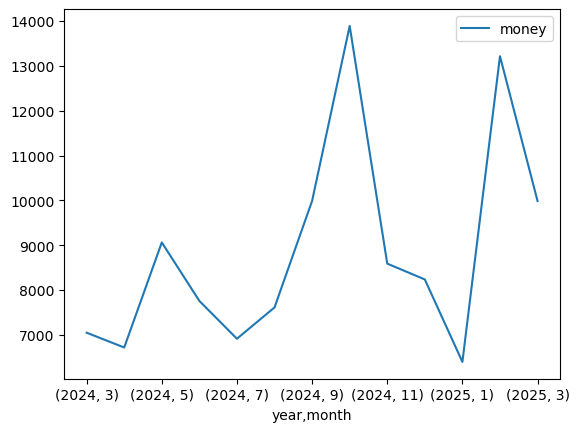

In [117]:
df_kopi_monthly.plot(kind="line")

In [131]:
df_kopi_monthly['money'].values

array([ 7050.2 ,  6720.56,  9063.42,  7758.76,  6915.94,  7613.84,
        9988.64, 13891.16,  8590.54,  8237.74,  6398.86, 13215.48,
        9986.44])

In [139]:
df_kopi_monthly.index

MultiIndex([(2024,  3),
            (2024,  4),
            (2024,  5),
            (2024,  6),
            (2024,  7),
            (2024,  8),
            (2024,  9),
            (2024, 10),
            (2024, 11),
            (2024, 12),
            (2025,  1),
            (2025,  2),
            (2025,  3)],
           names=['year', 'month'])

In [136]:
df_kopi_monthly.index.get_level_values(0)

Index([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2025,
       2025],
      dtype='int32', name='year')

In [137]:
df_kopi_monthly.index.get_level_values(1)

Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3], dtype='int32', name='month')

In [144]:
str_labels = df_kopi_monthly.index.get_level_values(0).astype(
    str).values + "-" + df_kopi_monthly.index.get_level_values(1).astype(str).values
str_labels

array(['2024-3', '2024-4', '2024-5', '2024-6', '2024-7', '2024-8',
       '2024-9', '2024-10', '2024-11', '2024-12', '2025-1', '2025-2',
       '2025-3'], dtype=object)

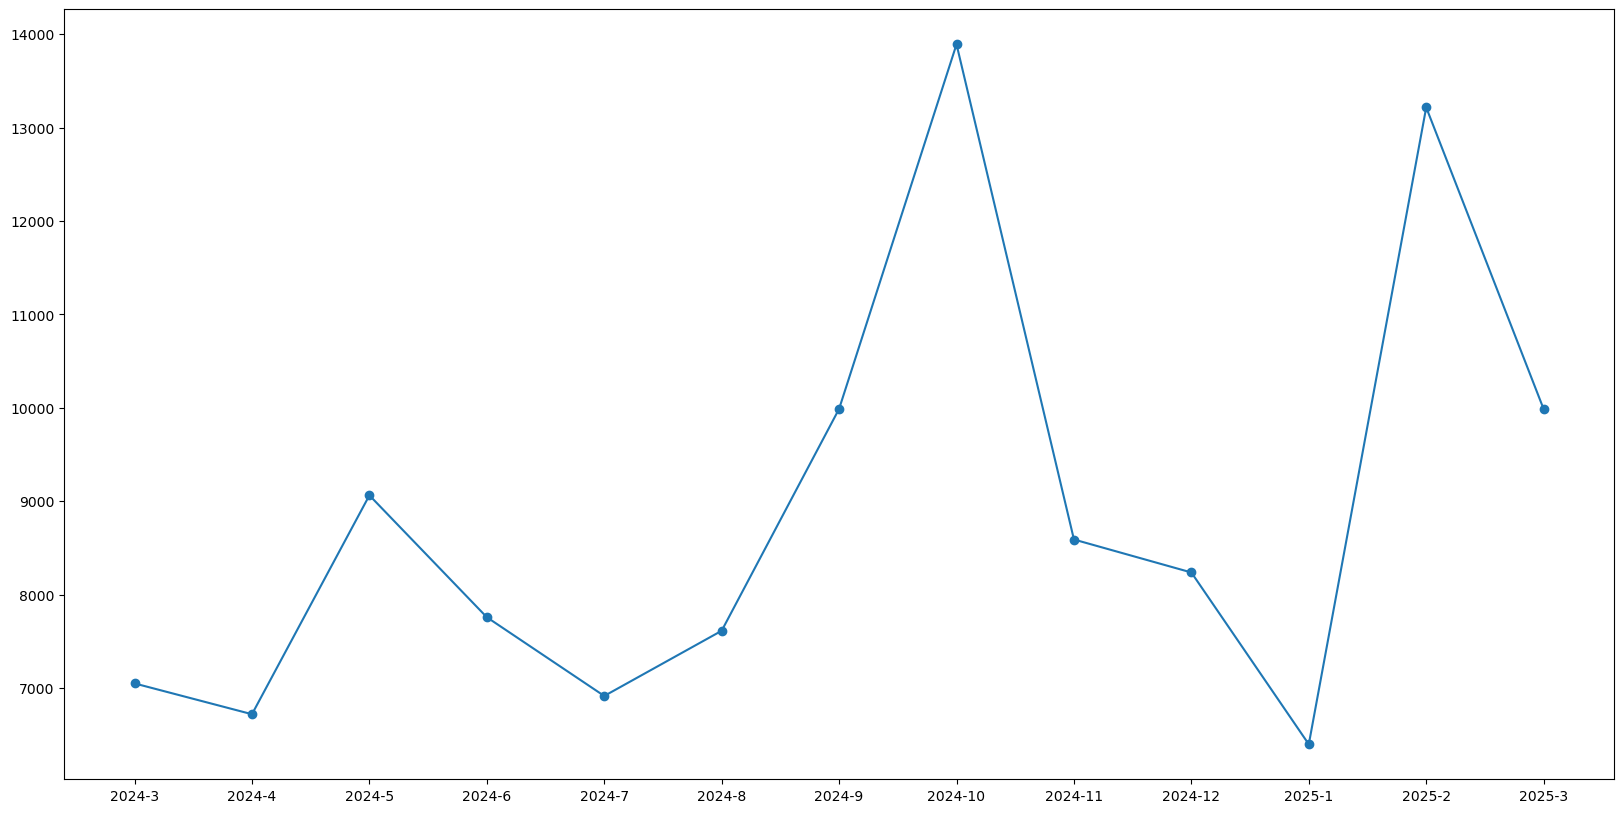

In [157]:
# pakai matplotlib pyplot untuk mempercantik grafik
plt.figure(figsize=(20, 10))
plt.plot(df_kopi_monthly['money'].values,
         marker="o")
plt.xticks(range(0, len(str_labels)), str_labels)
plt.show()

## Area Chart

untuk melihat trend (line chart) dan komparasi antar kategori (bar chart), saat lebih penting melihat total keseluruhan (kumulatif) dibanding total per kategori, dan tidak terlalu penting detail angka nya, hasil chart tidak terlalu akurat sebagai perbandingan


In [164]:
# total penjualan kopi antara tipe kopi berbeda
df_kopi_date = df_kopi.copy()
df_kopi_date['date'] = pd.to_datetime(df_kopi_date['date'])

df_kopi_mar24 = df_kopi_date[(df_kopi_date['date'].dt.year ==
                              2024) & (df_kopi_date['date'].dt.month == 3)]

df_kopi_mar24

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
...,...,...,...,...,...,...
201,2024-03-30,2024-03-30 16:12:31.786,card,ANON-0000-0000-0017,38.7,Latte
202,2024-03-30,2024-03-30 16:36:40.513,card,ANON-0000-0000-0009,38.7,Latte
203,2024-03-30,2024-03-30 16:37:57.553,card,ANON-0000-0000-0009,33.8,Americano with Milk
204,2024-03-31,2024-03-31 10:40:04.523,card,ANON-0000-0000-0089,38.7,Cappuccino


In [171]:
df_kopi_latte = df_kopi_mar24[df_kopi_mar24['coffee_name'] == 'Latte']
df_kopi_choc = df_kopi_mar24[df_kopi_mar24['coffee_name'] == 'Hot Chocolate']
df_kopi_americano = df_kopi_mar24[df_kopi_mar24['coffee_name'] == 'Americano']

In [176]:
df_kopi_mar24v2 = df_kopi_mar24[[
    "date", "money", "coffee_name"]].set_index("date")
df_kopi_mar24v2

,money,coffee_name
date,,
2024-03-01,38.7,Latte
2024-03-01,38.7,Hot Chocolate
2024-03-01,38.7,Hot Chocolate
2024-03-01,28.9,Americano
2024-03-01,38.7,Latte
...,...,...
2024-03-30,38.7,Latte
2024-03-30,38.7,Latte
2024-03-30,33.8,Americano with Milk


In [180]:
df_kopi_latte_sum = df_kopi_latte.groupby("date").agg({"money": "sum"})

df_kopi_choc_sum = df_kopi_choc.groupby("date").agg({"money": "sum"})

df_kopi_americano_sum = df_kopi_americano.groupby("date").agg({"money": "sum"})

In [186]:
df_kopi_percat = pd.concat(
    [df_kopi_latte_sum, df_kopi_choc_sum, df_kopi_americano_sum], axis=1)

df_kopi_percat.columns = ["Latte", "Hot Chocolate", "Americano"]
df_kopi_percat = df_kopi_percat.fillna(0)

df_kopi_percat

,Latte,Hot Chocolate,Americano
date,,,
2024-03-01,77.4,116.1,28.9
2024-03-02,40.0,0.0,86.7
2024-03-03,78.7,77.4,28.9
2024-03-04,77.4,0.0,0.0
2024-03-05,116.1,154.8,0.0
2024-03-06,0.0,0.0,28.9
2024-03-07,118.7,38.7,28.9
2024-03-08,77.4,0.0,86.7
2024-03-09,38.7,117.4,86.7


<Axes: xlabel='date'>

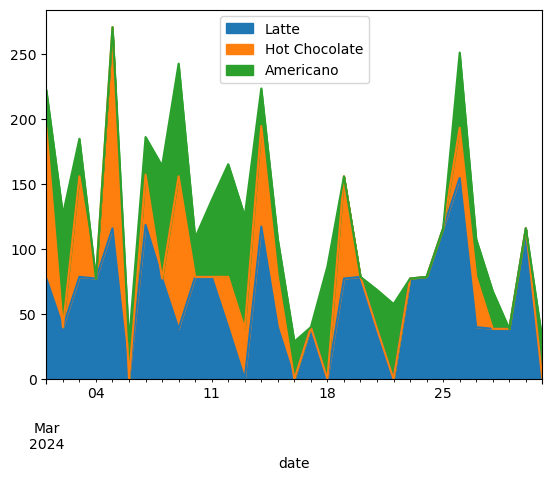

In [187]:
df_kopi_percat.plot(kind="area")

In [194]:
df_kopi_percat.T

date,2024-03-01,2024-03-02,2024-03-03,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09,2024-03-10,...,2024-03-22,2024-03-23,2024-03-24,2024-03-25,2024-03-26,2024-03-27,2024-03-28,2024-03-29,2024-03-30,2024-03-31
Latte,77.4,40.0,78.7,77.4,116.1,0.0,118.7,77.4,38.7,78.7,...,0.0,77.4,78.7,116.1,154.8,40.0,38.7,38.7,116.1,0.0
Hot Chocolate,116.1,0.0,77.4,0.0,154.8,0.0,38.7,0.0,117.4,0.0,...,0.0,0.0,0.0,0.0,38.7,38.7,0.0,0.0,0.0,0.0
Americano,28.9,86.7,28.9,0.0,0.0,28.9,28.9,86.7,86.7,30.0,...,57.8,0.0,0.0,0.0,57.8,28.9,28.9,0.0,0.0,30.0


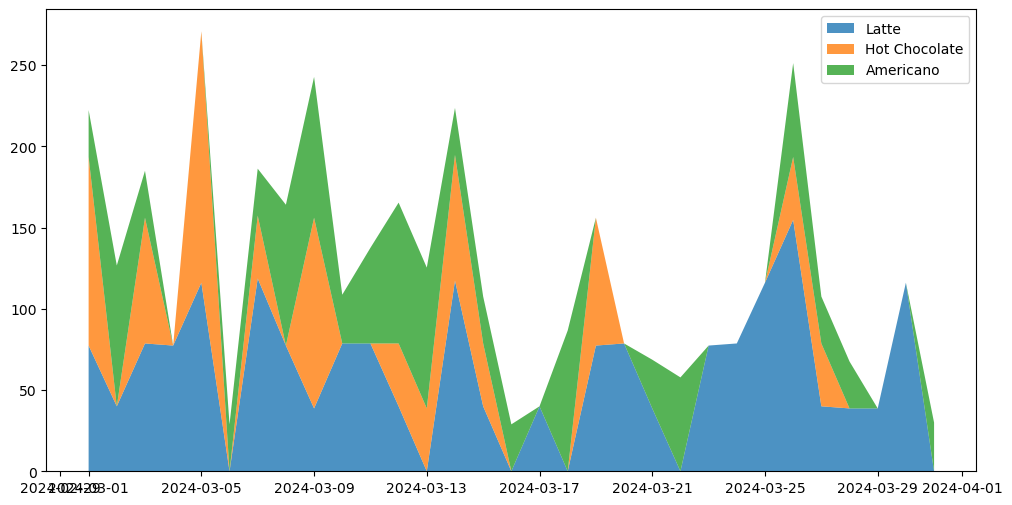

In [ ]:
plt.figure(figsize=(12, 6))
plt.stackplot(df_kopi_percat.index, df_kopi_percat.T,
              alpha=0.8,
              labels=df_kopi_percat.columns)
# plt.xticks perlu di update, belum pas
plt.legend(df_kopi_percat.columns)
plt.show()

## Scatter Plot

seringkali digunakan untuk melihat korelasi antara dua data yang continuous  
** jangan digunakan untuk data discrete/ kategorikal  
** jangan digunakan untuk melihat trend data per waktu - itu gunakan line chart atau area chart


In [207]:
df_mobil = pd.read_csv("dataset/BMW_Car_Sales_Classification.csv")
df_mobil.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


<Axes: xlabel='Mileage_KM', ylabel='Price_USD'>

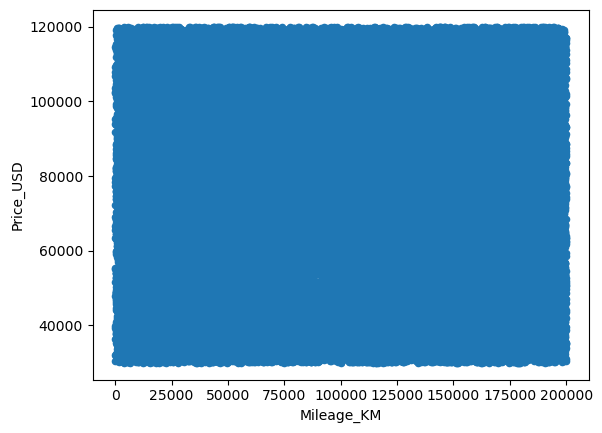

In [209]:
# adakah korelasi antara mileage dengan price sebuah mobil
df_mobil[['Mileage_KM', 'Price_USD']].plot(
    x="Mileage_KM", y="Price_USD", kind="scatter")

data diatas menunjukkan tidak ada korelasi sama sekali, kita coba filter ke tipe dan model tertentu untuk lihat apakah ada korelasi kalau jenis dan tipe mobil sama

misalnya, 5 Series, Petrol, Automatic, 2016


<Axes: xlabel='Mileage_KM', ylabel='Price_USD'>

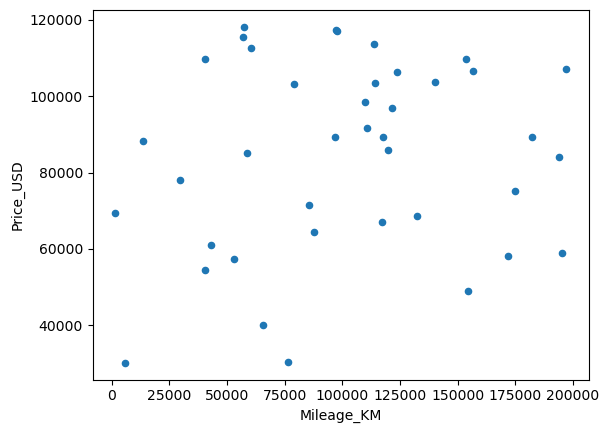

In [211]:
k1 = df_mobil['Model'] == '5 Series'
k2 = df_mobil['Fuel_Type'] == 'Petrol'
k3 = df_mobil['Transmission'] == 'Automatic'
k4 = df_mobil['Year'] == 2016

df_mobil[k1 & k2 & k3 & k4].plot(kind="scatter", x="Mileage_KM", y="Price_USD")

walaupun sudah di filter ke tipe mobil tertentu, tetap tidak ada korelasi antara mileage dengan price


## Box and Whisker plot (Boxplot)

melihat 5 angka statistik sebuah dataset dengan cepat secara visual, termasuk adakah outlier/tidak

- Q1, Q2, Q3
- lower extreme, upper extreme

extreme dihitung dengan cara mencari IQR (Q3-Q1) lalu 1.5\*IQR dari Q1 kebawah, atau 1.5\*IQR dari Q3 keatas, adalah kedua extreme tersebut. yang di luar extreme dianggap outlier


In [213]:
# misalnya untuk harga mobil yang kita filter tadi, 5 Series Petrol Automatic 2016
df_mobil1 = df_mobil[k1 & k2 & k3 & k4]
df_mobil1.head(3)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
699,5 Series,2016,Asia,Blue,Petrol,Automatic,2.3,113868,113702,6803,Low
6011,5 Series,2016,Middle East,Grey,Petrol,Automatic,3.1,109929,98400,6512,Low
6150,5 Series,2016,Asia,Blue,Petrol,Automatic,1.9,13720,88318,1247,Low


In [214]:
df_mobil1.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,40.0,40.000000,40.000000,40.000000,40.000000
mean,2016.0,3.057500,101243.025000,84408.325000,4893.250000
std,0.0,0.977146,53635.421186,25000.600073,2737.356583
min,2016.0,1.700000,1577.000000,30152.000000,419.000000
25%,2016.0,2.200000,58480.750000,66404.750000,2603.750000
50%,2016.0,2.950000,103755.000000,88771.000000,4407.500000
75%,2016.0,3.825000,134458.000000,106313.500000,6968.750000
max,2016.0,4.900000,197017.000000,118205.000000,9758.000000


<Axes: >

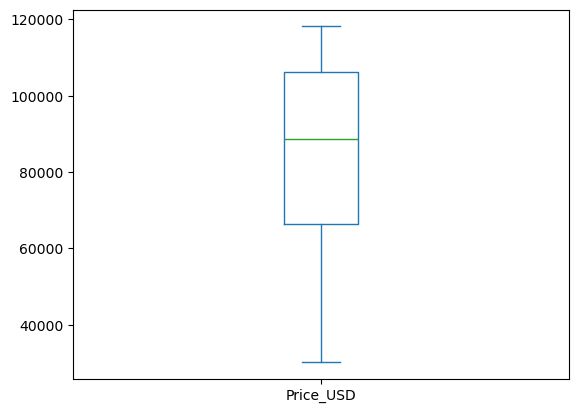

In [217]:
df_mobil1[['Price_USD']].plot(kind="box")

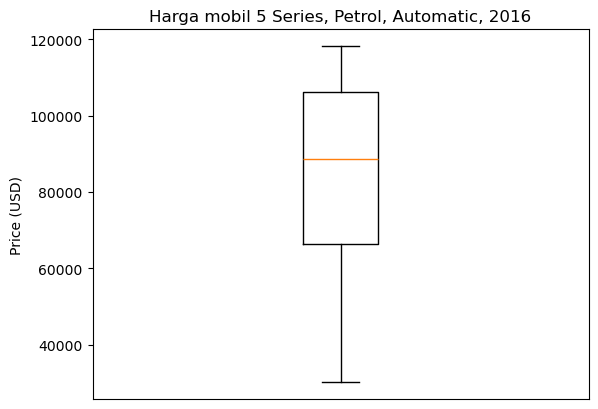

In [ ]:
plt.boxplot(df_mobil1[['Price_USD']])
plt.title("Harga mobil 5 Series, Petrol, Automatic, 2016")
plt.xticks([])
plt.ylabel("Price (USD)")
plt.show()

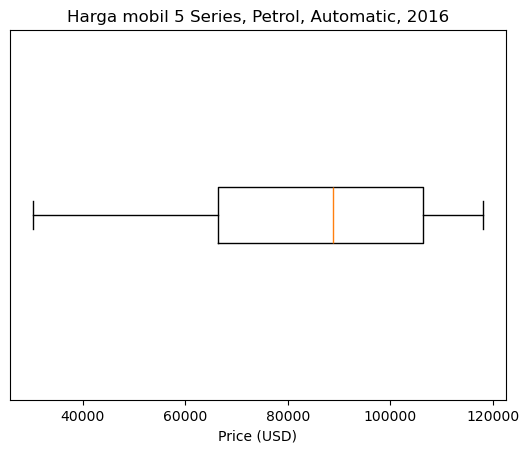

In [231]:
# plt.boxplot(df_mobil1[['Price_USD']], orientation="horizontal")
plt.boxplot(df_mobil1[['Price_USD']], vert=False)
plt.title("Harga mobil 5 Series, Petrol, Automatic, 2016")
plt.yticks([])
plt.xlabel("Price (USD)")
plt.show()

## Histogram

penggabungan per range data, setiap range ada berapa x.

ini adalah visualisasi frekuensi per grup data.

untuk data tipe continuous.

misalnya, data harga mobil antara 0-10000 usd ada berapa mobil? lanjut 10-20rb, 20-30rb, ...


<Axes: ylabel='Frequency'>

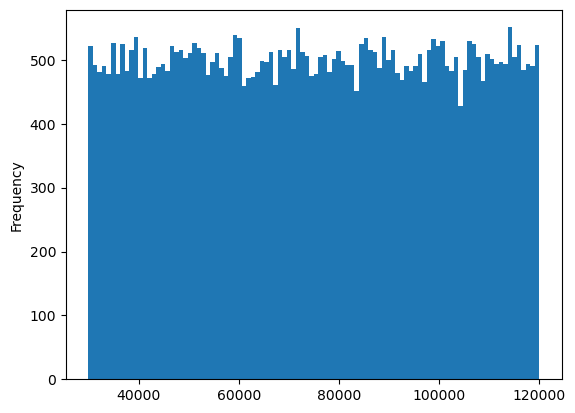

In [236]:
# kita set ada berapa grup dengan jumlah bins

df_mobil['Price_USD'].plot(kind="hist", bins=100)

<Axes: ylabel='Frequency'>

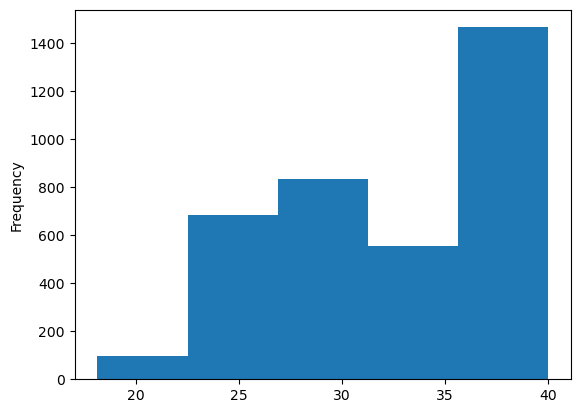

In [238]:
df_kopi['money'].plot(kind="hist", bins=5)

In [250]:
# kita benerin xticks nya dengan bantuan numpy
np.histogram(df_kopi['money'])

(array([  36,   59,  222,  463,  435,  400,  490,   66, 1287,  178],
       dtype=int64),
 array([18.12 , 20.308, 22.496, 24.684, 26.872, 29.06 , 31.248, 33.436,
        35.624, 37.812, 40.   ]))

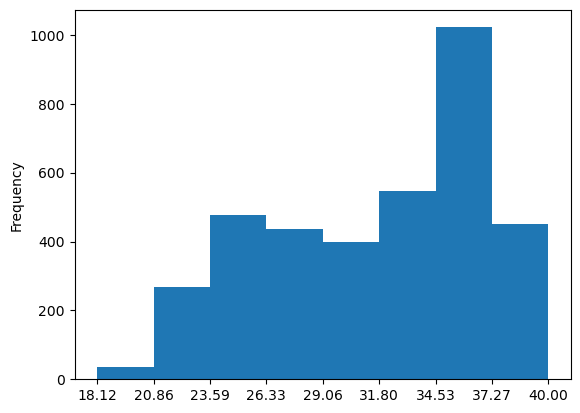

In [246]:
# jumlah bins di sama kan
b = 8

freq, bin_edges = np.histogram(df_kopi['money'], bins=b)

df_kopi['money'].plot(kind="hist", bins=b)
plt.xticks(bin_edges)
plt.show()

In [249]:
# assign lebih dari 1 variable sekaligus
a, b, c = (23, 56, 5890)

print(a)

23


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


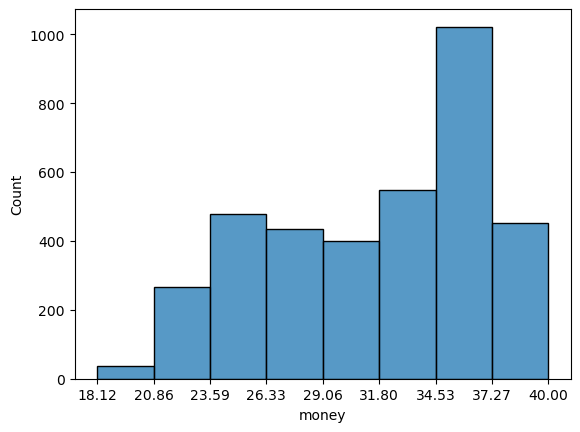

In [253]:
b = 8
freq, bin_edges = np.histogram(df_kopi['money'], bins=b)

sns.histplot(df_kopi['money'], bins=b)

plt.xticks(bin_edges)
plt.show()

# Latihan

coba kita buat sebuah data storytelling menggundakan data coffee_sales

- audiens adalah para barista (sales)
- tujuan untuk meningkatkan jumlah penjualan
- analisa produk mana yang populer


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_kopi = pd.read_csv("dataset/coffee_sales.csv")

df_kopi.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df_kopi['cash_type'].value_counts()

cash_type
card    3547
cash      89
Name: count, dtype: int64

In [8]:
df_kopi_cash = df_kopi['cash_type'].value_counts()

<Axes: ylabel='count'>

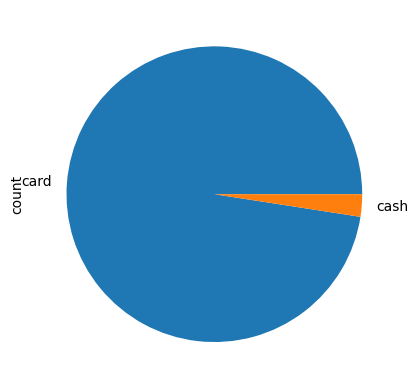

In [9]:
df_kopi_cash.plot(y="count", kind="pie")

In [12]:
df_kopi_totalmoney = df_kopi.groupby('coffee_name').agg({"money": "sum"})
df_kopi_totalmoney

,money
coffee_name,
Americano,15062.26
Americano with Milk,25269.12
Cappuccino,18034.14
Cocoa,8678.16
Cortado,7534.86
Espresso,2814.28
Hot Chocolate,10172.46
Latte,27866.30


<BarContainer object of 8 artists>

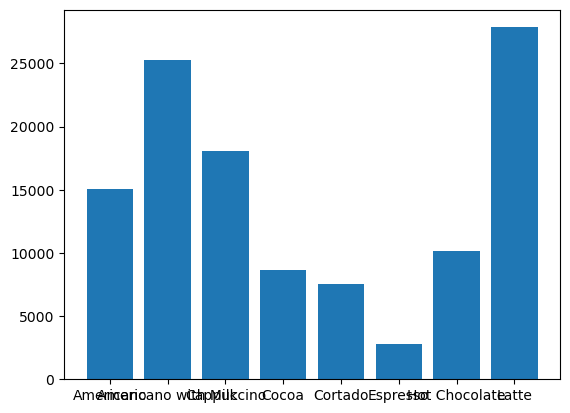

In [15]:
plt.bar(df_kopi_totalmoney.index, df_kopi_totalmoney['money'])